In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(9845)

mileage_df = pd.DataFrame({
    "age_month": np.random.randint(1, 240, size=1000)
})
raw_mileage = mileage_df["age_month"] * np.random.normal(loc=1.295, scale=0.4, size=1000)
mileage_df["mileage_kkm"] = raw_mileage* np.random.normal(loc=1.0, scale=0.3, size=1000)
mileage_df.sample(5)

,age_month,mileage_kkm
289,205,264.365035
286,49,59.811651
532,165,132.368277
613,113,266.996451
877,109,181.840407


<Axes: xlabel='age_month', ylabel='mileage_kkm'>

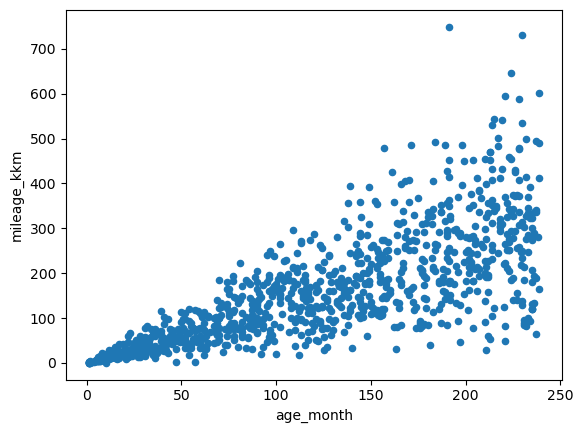

In [3]:
mileage_df.plot.scatter(x="age_month", y="mileage_kkm")

In [4]:
import matplotlib.pyplot as plt

In [5]:
mileage_mean = mileage_df["mileage_kkm"].mean()
mileage_mean

157.51727263229685

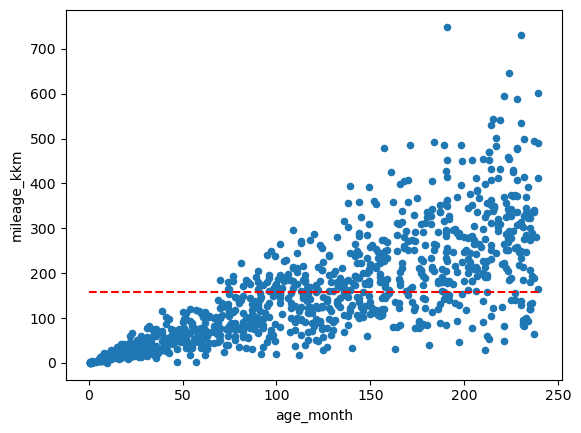

In [6]:
mileage_df.plot.scatter(x="age_month", y="mileage_kkm")
plt.plot([0, 240], [mileage_mean, mileage_mean], "r--")

### Podział na podzbiory

In [7]:
new_mileage_mean = mileage_df.query("age_month < 60")["mileage_kkm"].mean()
new_mileage_mean

35.35147696864695

In [8]:
old_mileage_mean = mileage_df.query("age_month > 60")["mileage_kkm"].mean()

In [9]:
old_mileage_mean

199.1446810425932

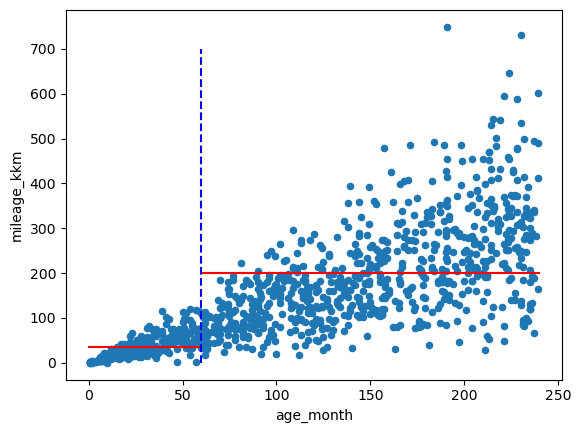

In [10]:
mileage_df.plot.scatter(x="age_month", y="mileage_kkm")
plt.plot([0, 60], [new_mileage_mean, new_mileage_mean], "r")
plt.plot([60, 60], [0, 700], "b--")
plt.plot([61, 240], [old_mileage_mean, old_mileage_mean], "r")

In [23]:
def draw_mean(month_from, month_to):
    range_mean = mileage_df.query(f"age_month >= {month_from}").query(f"age_month <= {month_to}").mean()
    plt.plot([month_from, month_to], [range_mean, range_mean], "r", linewidth=2)
    plt.plot([month_to, month_to], [0, 750], "b", linewidth=1)

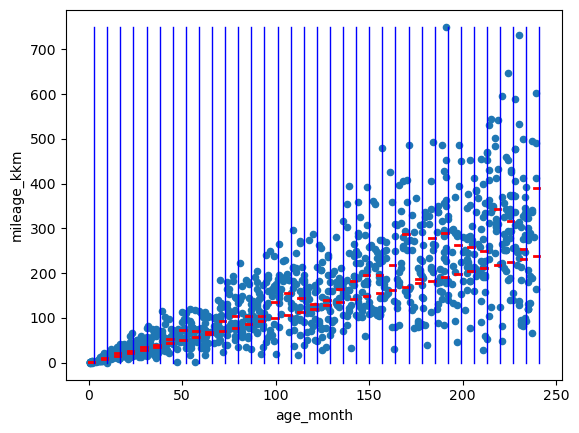

In [24]:
mileage_df.plot.scatter(x="age_month", y="mileage_kkm")
for month_start in range(0, 240, 7):
    draw_mean(month_start, month_start + 3)